<a href="https://colab.research.google.com/github/Siriprapa-tewee/229351/blob/main/Copy_of_Lab06_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [2]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

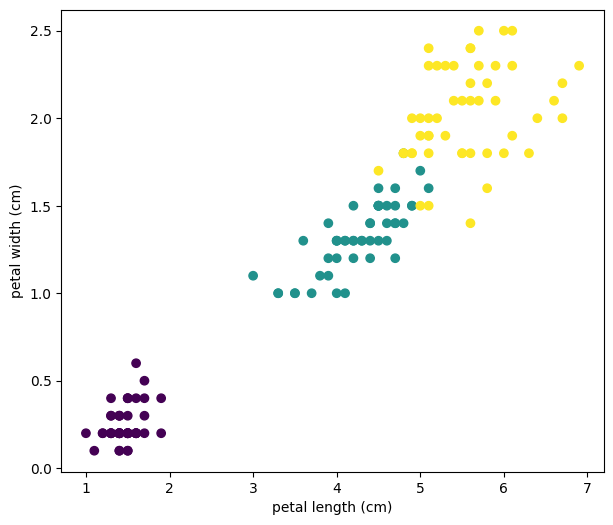

In [3]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [4]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

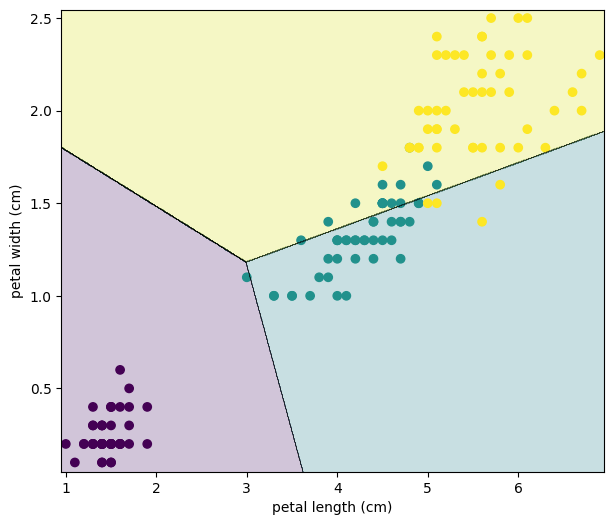

In [8]:
linsvm = LinearSVC(C=0.1)
linsvm.fit(X_train, y_train)

plot_decision_boundary(linsvm, X, y)

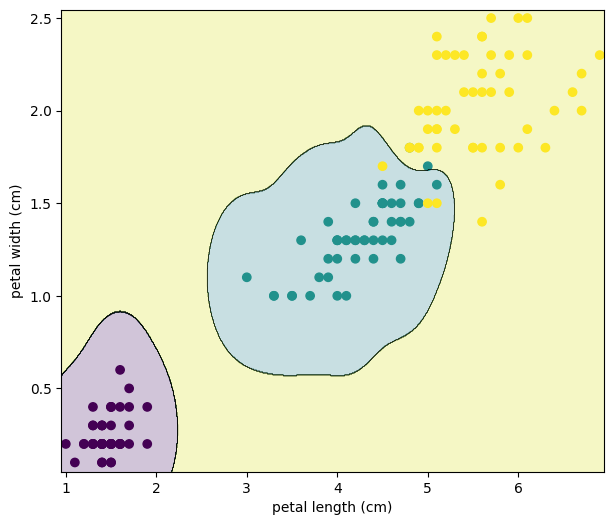

In [9]:
svm = SVC(kernel='rbf', gamma=10)
svm.fit(X_train, y_train)

plot_decision_boundary(svm, X, y)

#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

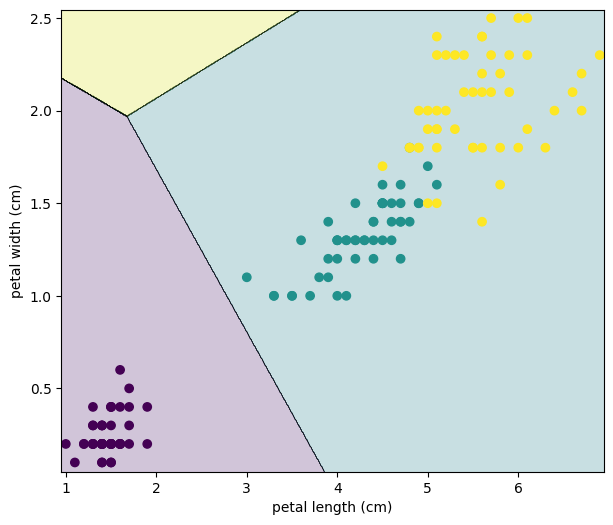

In [11]:
# C = 0.01
linsvm = LinearSVC(loss='hinge', C=0.01)
linsvm.fit(X_train, y_train)

plot_decision_boundary(linsvm, X, y)

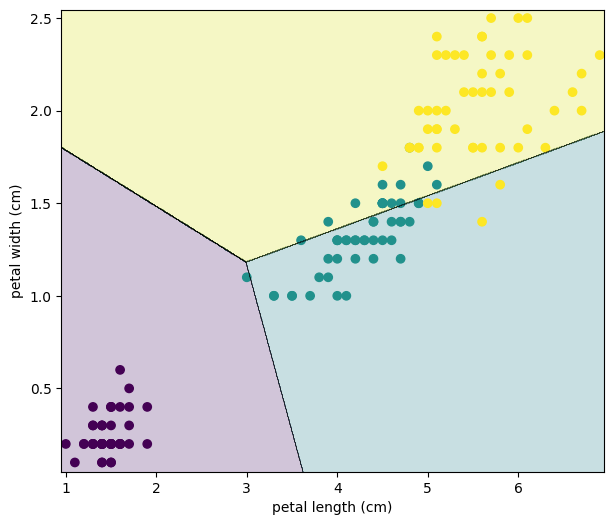

In [13]:
# C = 0.1
linsvm = LinearSVC(C=0.1)
linsvm.fit(X_train, y_train)

plot_decision_boundary(linsvm, X, y)

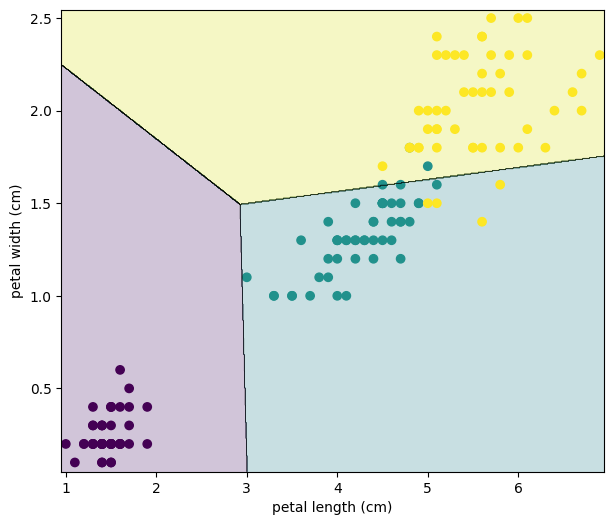

In [14]:
# C = 1.0
linsvm = LinearSVC(C=1.0)
linsvm.fit(X_train, y_train)

plot_decision_boundary(linsvm, X, y)

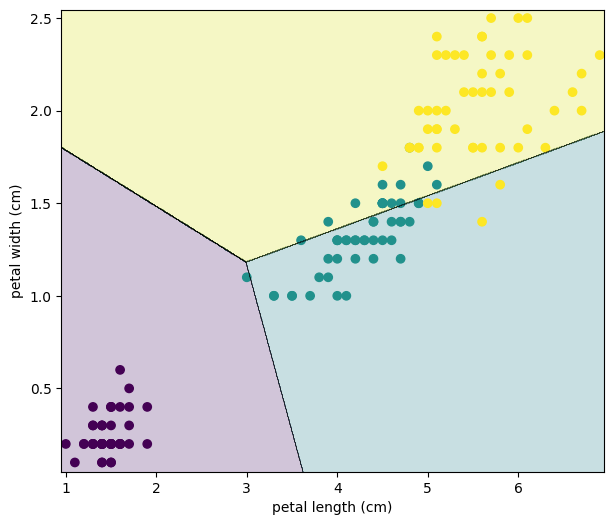

In [15]:
# C = 10.0
linsvm = LinearSVC(C=0.1)
linsvm.fit(X_train, y_train)

plot_decision_boundary(linsvm, X, y)

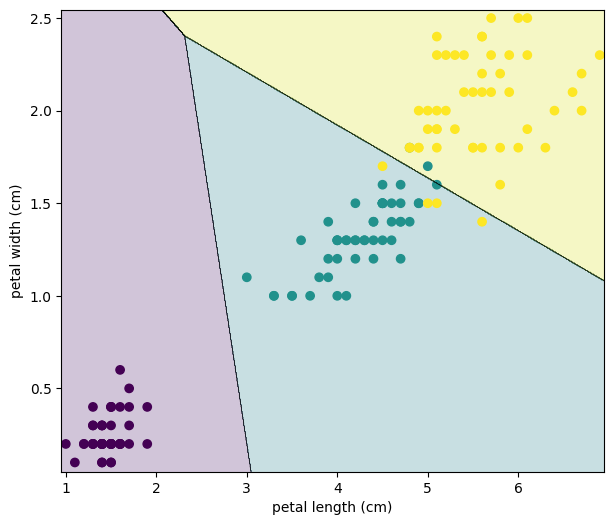

In [16]:
# C = 100.0
linsvm = LinearSVC(C=100.0)
linsvm.fit(X_train, y_train)
plot_decision_boundary(linsvm, X, y)

What is the effect of C on the decision boundary?

พารามิเตอร์ C ใน LinearSVC ควบคุมการแลกเปลี่ยนระหว่างการได้ข้อผิดพลาดจากการฝึกฝนที่ต่ำ (low training error) และระยะห่างของขอบการตัดสินใจ (margin) ที่กว้าง:

ค่า C ที่น้อย (เช่น 0.01, 0.1): เมื่อ C มีค่าน้อย โมเดลจะอนุญาตให้มีขอบเขตที่กว้างขึ้น และอาจจะทำให้การจำแนกจุดข้อมูลบางจุดผิดพลาดในชุดข้อมูลฝึกฝนก็ตาม สิ่งนี้ส่งผลให้เกิด ขอบเขตที่ยืดหยุ่นกว่า (softer margin) และโมเดลที่มีการควบคุม (regularized) มากขึ้น ซึ่งสามารถป้องกันการเกิดภาวะ Overfitting ได้ แต่ก็อาจนำไปสู่ภาวะ Underfitting ได้หาก C มีค่าน้อยเกินไป

ค่า C ที่มาก (เช่น 10.0, 100.0): เมื่อ C มีค่ามาก โมเดลจะให้โทษกับการจำแนกผิดพลาดอย่างรุนแรงมากขึ้น มันพยายามจำแนกจุดข้อมูลในชุดข้อมูลฝึกฝนทั้งหมดให้ถูกต้อง ซึ่งนำไปสู่ ขอบเขตที่แข็งกว่า (harder margin) และระยะห่างที่แคบลง สิ่งนี้อาจนำไปสู่ภาวะ Overfitting ซึ่งโมเดลเรียนรู้ข้อมูลฝึกฝนได้ดีเกินไป แต่ทำงานได้ไม่ดีกับข้อมูลที่ไม่เคยเห็นมาก่อน

โดยสรุปแล้ว C ที่น้อยทำให้ขอบเขตการตัดสินใจยอมรับข้อผิดพลาดจากการฝึกฝนได้มากขึ้น ส่งผลให้ขอบเขตเรียบง่ายขึ้น ในขณะที่ C ที่มากทำให้ขอบเขตการตัดสินใจไม่ยอมรับข้อผิดพลาดเหล่านี้น้อยลง พยายามแยกข้อมูลฝึกฝนอย่างสมบูรณ์ ซึ่งอาจนำไปสู่การ Overfiting

#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

In [36]:
linsvm_selected = LinearSVC(loss='hinge', C=1.0, max_iter=100000) # Using C=1.0 as a reasonable choice
linsvm_selected.fit(X_train, y_train)

accuracy = linsvm_selected.score(X_test, y_test)
test_error = 1 - accuracy

print(f"Test error for LinearSVC (C=1.0): {test_error:.4f}")

Test error for LinearSVC (C=1.0): 0.2000


เมื่อค่า C = 1.0 และ loss='hinge' จะได้ว่า โมเดลมีความผิดพลาดอยู่ที่ 20%

### Exploring different gamma values for Kernel SVM (Exercise 4)

#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

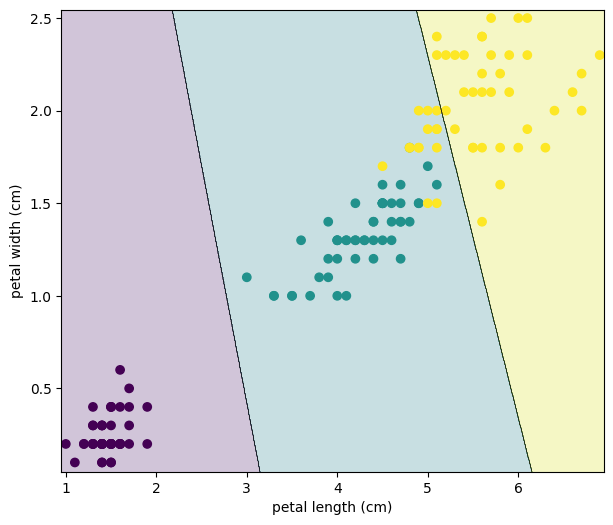

In [22]:
# C = 1.0, gamma = 0.01
svm_gamma_0_01 = SVC(kernel='rbf', C=1.0, gamma=0.01)
svm_gamma_0_01.fit(X_train, y_train)

plot_decision_boundary(svm_gamma_0_01, X, y)

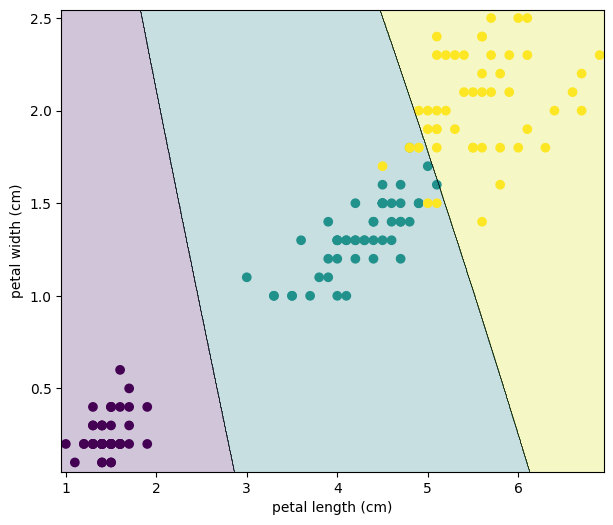

In [23]:
# C = 1.0, gamma = 0.1
svm_gamma_0_1 = SVC(kernel='rbf', C=1.0, gamma=0.1)
svm_gamma_0_1.fit(X_train, y_train)

plot_decision_boundary(svm_gamma_0_1, X, y)

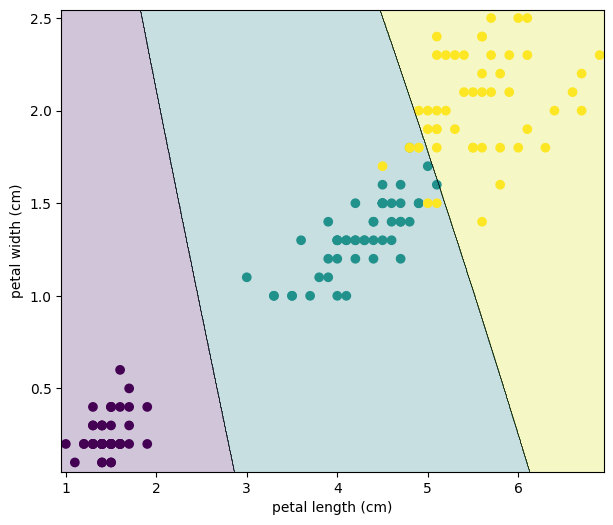

In [24]:
# C = 1.0, gamma = 0.1
svm_gamma_0_1 = SVC(kernel='rbf', C=1.0, gamma=0.1)
svm_gamma_0_1.fit(X_train, y_train)

plot_decision_boundary(svm_gamma_0_1, X, y)

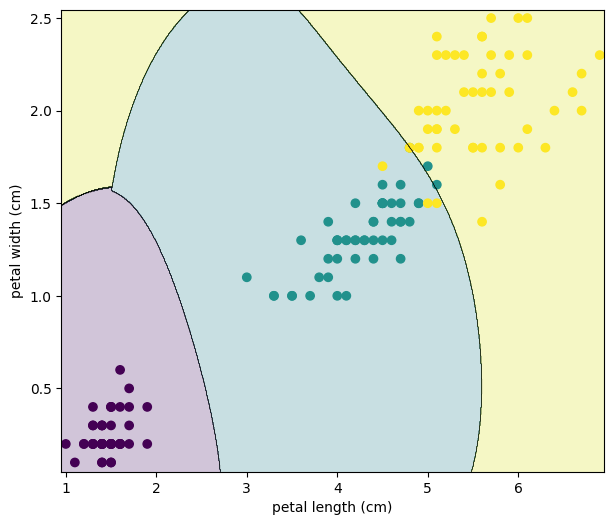

In [25]:
# C = 1.0, gamma = 1.0
svm_gamma_1_0 = SVC(kernel='rbf', C=1.0, gamma=1.0)
svm_gamma_1_0.fit(X_train, y_train)

plot_decision_boundary(svm_gamma_1_0, X, y)

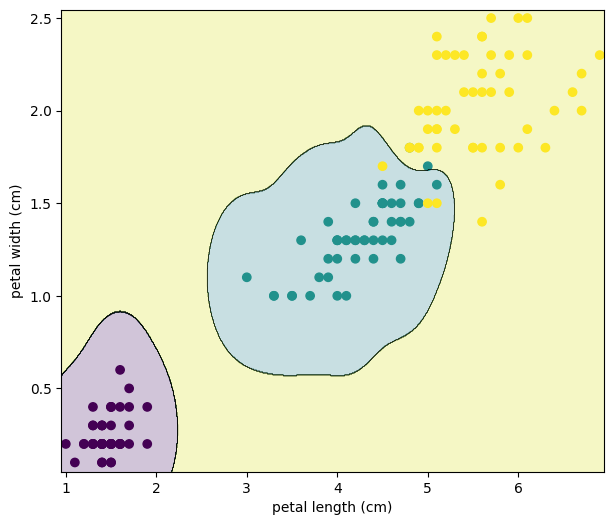

In [26]:
# C = 1.0, gamma = 10.0
svm_gamma_10_0 = SVC(kernel='rbf', C=1.0, gamma=10.0)
svm_gamma_10_0.fit(X_train, y_train)

plot_decision_boundary(svm_gamma_10_0, X, y)

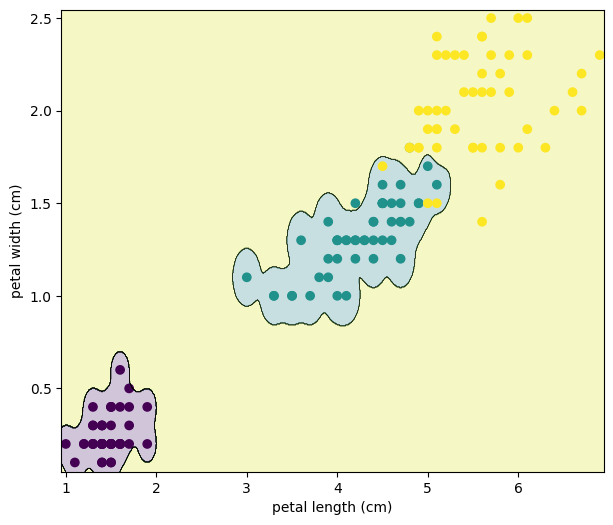

In [27]:
# C = 1.0, gamma = 100.0
svm_gamma_100_0 = SVC(kernel='rbf', C=1.0, gamma=100.0)
svm_gamma_100_0.fit(X_train, y_train)

plot_decision_boundary(svm_gamma_100_0, X, y)

What is the effect of gamma on the decision boundary?

พารามิเตอร์ gamma ใน Kernel SVM ควบคุมรัศมีอิทธิพลของข้อมูลตัวอย่างแต่ละจุดในการฝึกฝน:

ค่า gamma ที่น้อย (เช่น 0.01, 0.1): เมื่อ gamma มีค่าน้อย หมายความว่าข้อมูลตัวอย่างแต่ละจุดมีพื้นที่อิทธิพลที่กว้างขวาง นั่นคือจุดข้อมูลที่อยู่ห่างออกไปก็ยังสามารถมีผลต่อการสร้างขอบเขตการตัดสินใจได้ สิ่งนี้ส่งผลให้ได้ขอบเขตการตัดสินใจที่ เรียบง่ายกว่า (smoother) และมีลักษณะเหมือนเส้นตรงมากขึ้น ซึ่งช่วยป้องกัน Overfitting ได้ดี แต่ก็อาจนำไปสู่ Underfitting ได้หาก gamma มีค่าน้อยเกินไป

ค่า gamma ที่มาก (เช่น 10.0, 100.0): เมื่อ gamma มีค่ามาก หมายความว่าข้อมูลตัวอย่างแต่ละจุดมีพื้นที่อิทธิพลที่จำกัดมาก มีเพียงจุดข้อมูลที่อยู่ใกล้เคียงเท่านั้นที่จะมีผลต่อการสร้างขอบเขตการตัดสินใจ สิ่งนี้ทำให้ขอบเขตการตัดสินใจ ซับซ้อนมากยิ่งขึ้น (more complex) และมีลักษณะที่ 'หยัก' หรือ 'คดเคี้ยว' ตามจุดข้อมูลแต่ละจุด เพื่อพยายามจำแนกทุกจุดในชุดข้อมูลฝึกฝนให้ถูกต้อง ซึ่งมักจะนำไปสู่ภาวะ Overfitting สูง ทำให้โมเดลทำงานได้ไม่ดีกับข้อมูลใหม่ที่ไม่เคยเห็นมาก่อน

โดยสรุปแล้ว gamma ที่น้อยทำให้ขอบเขตการตัดสินใจกว้างและเรียบง่าย ในขณะที่ gamma ที่มากทำให้ขอบเขตการตัดสินใจแคบและซับซ้อนมากตามข้อมูลฝึกฝน

#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

In [37]:
from sklearn.metrics import accuracy_score

# Choose C = 1.0, gamma = 1.0
svm_selected = SVC(kernel='rbf', C=1.0, gamma=1.0)
svm_selected.fit(X_train, y_train)

y_pred_test_svm = svm_selected.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_test_svm)
test_error_svm = 1 - accuracy_svm

# Number of support vectors for each class
num_support_vectors = svm_selected.n_support_

print(f"Kernel SVM Test Error (C=1.0, gamma=1.0): {test_error_svm:.4f}")
print(f"Number of support vectors per class: {num_support_vectors}")
print(f"Total number of support vectors: {sum(num_support_vectors)}")

Kernel SVM Test Error (C=1.0, gamma=1.0): 0.0667
Number of support vectors per class: [ 3 10 11]
Total number of support vectors: 24


Kernel SVM Test Error (C=1.0, gamma=1.0): 0.0667

ค่า 0.0667 หมายความว่าโมเดลทำนายผิดพลาดไปประมาณ 6.67% ของข้อมูลทดสอบ

Number of support vectors per class: [ 3 10 11]

[ 3 10 11] หมายความว่า:
คลาสแรกมี Support Vectors 3 จุด
คลาสที่สองมี Support Vectors 10 จุด
คลาสที่สามมี Support Vectors 11 จุด
จำนวน Support Vectors ที่แตกต่างกันในแต่ละคลาสบ่งบอกว่าข้อมูลของคลาสเหล่านั้นมีการกระจายตัวและมีความท้าทายในการแยกที่แตกต่างกันออกไป


#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot

1. Explain using test accuracy
ความแม่นยำในการทดสอบ: Kernel SVM (ความแม่นยำ 93.33%) มีประสิทธิภาพเหนือกว่า Linear SVM (ความแม่นยำ 80%)

1. Explain using decision boundary plot
ขอบเขตการตัดสินใจ: Kernel SVM สร้างขอบเขตที่ซับซ้อนและโค้งงอ ซึ่งเหมาะสมกับข้อมูล Iris ที่ไม่สามารถแยกเชิงเส้นได้ ในขณะที่ Linear SVM สร้างขอบเขตเป็นเส้นตรง
จึงสรุปได้ว่า Kernel SVM เป็นโมเดลที่เหมาะสมกว่าสำหรับการจำแนกข้อมูลชุดนี้